# Result for Quantization case

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from dataset import *
import math
import eval
import greycode_quantization as quan

## Loss

### Training Loss

#### ENCODER/FNN/CNN/CNN SPEED

min loss: 0.36001491015271625
min loss: 0.27845551639564275
min loss: 0.3539841010020329
min loss: 0.3542458937718318


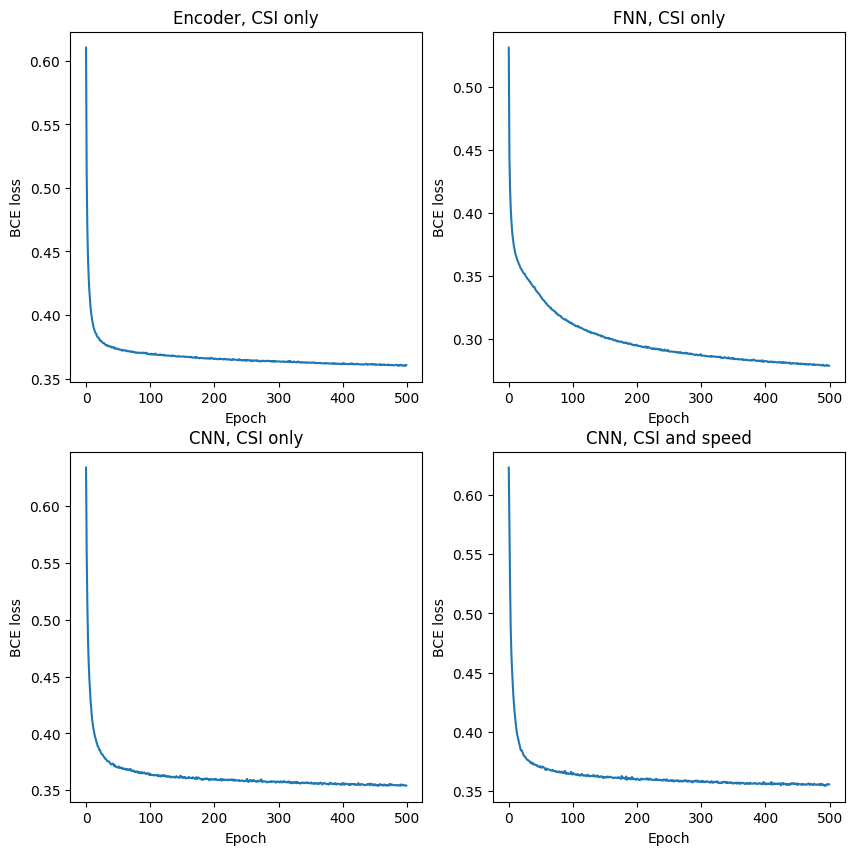

In [2]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
losses = np.load('encoder_basic_quan/losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('Encoder, CSI only')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min loss:',min(losses[1]))

plt.subplot(2, 2, 2)
losses = np.load('fnn_basic_quan/losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('FNN, CSI only')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min loss:',min(losses[1]))

plt.subplot(2, 2, 3)
losses = np.load('cnn_basic_quan/losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('CNN, CSI only')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min loss:',min(losses[1]))

plt.subplot(2, 2, 4)
losses = np.load('cnn_speed_quan/losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('CNN, CSI and speed')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min loss:',min(losses[1]))

plt.show()


min loss: 0.35441467211796684


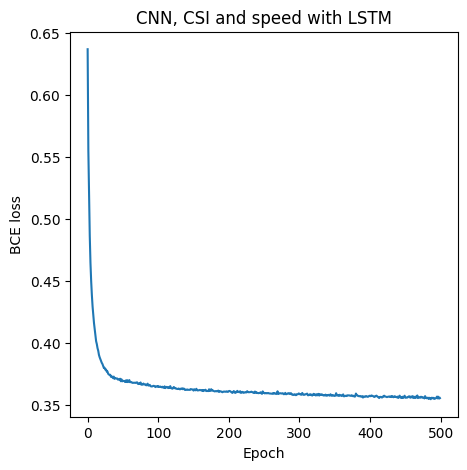

In [3]:
losses = np.load('cnn_speed_quan_with_LSTM/losses.npy')
plt.figure(figsize=(5, 5))
plt.plot(losses[0],losses[1])
plt.title('CNN, CSI and speed with LSTM')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min loss:',min(losses[1]))
plt.show()

#### ENCODER / FNN for hover & moving

min loss: 0.49083748103967356
min loss: 0.29803046317242865
min loss: 0.5486509058720026
min loss: 0.3432395271001718


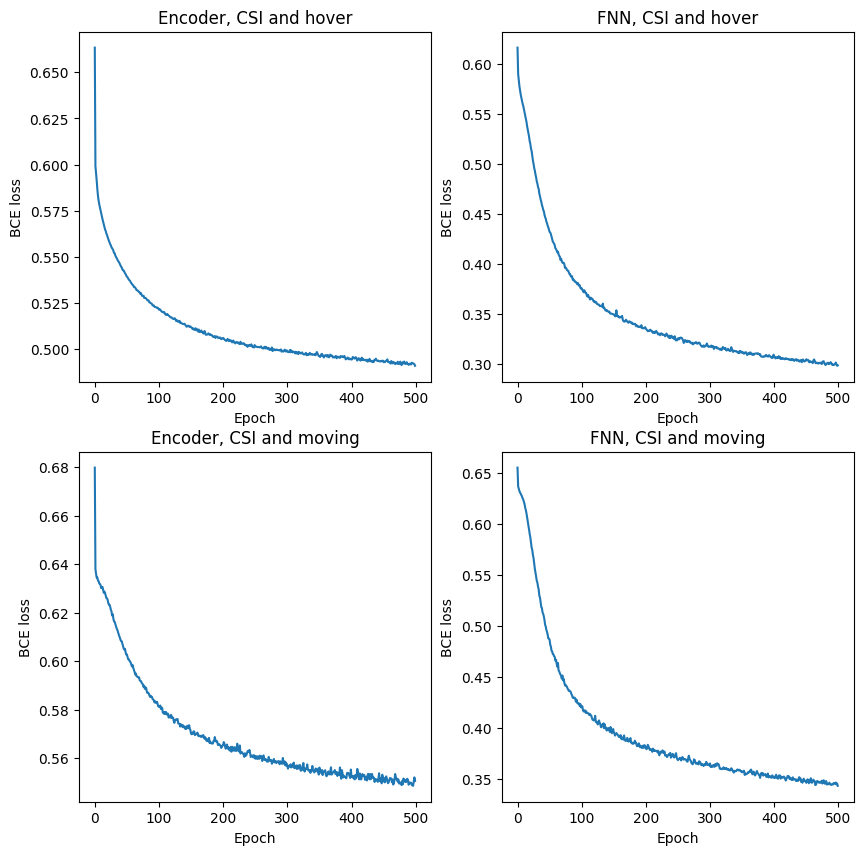

In [4]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
losses = np.load('encoder_basic_quan_hover/losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('Encoder, CSI and hover')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min loss:',min(losses[1]))

plt.subplot(2, 2, 2)
losses = np.load('fnn_basic_quan_hover/losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('FNN, CSI and hover')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min loss:',min(losses[1]))

plt.subplot(2, 2, 3)
losses = np.load('encoder_basic_quan_moving/losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('Encoder, CSI and moving')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min loss:',min(losses[1]))

plt.subplot(2, 2, 4)
losses = np.load('fnn_basic_quan_moving/losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('FNN, CSI and moving')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min loss:',min(losses[1]))

plt.show()

### Validation loss

min val loss: 0.5888857041534624
min val loss: 0.5911241424711127
min val loss: 0.4077219267686208
min val loss: 0.41035616397857666


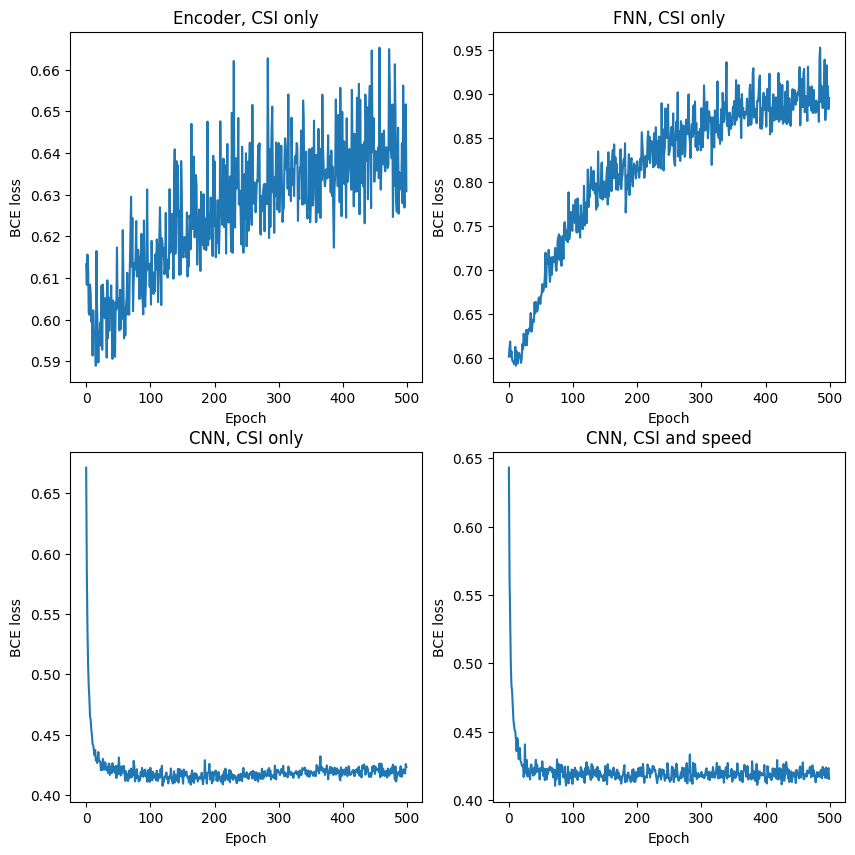

In [5]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
val_losses = np.load('encoder_basic_quan/val_losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(val_losses[0],val_losses[1])
plt.title('Encoder, CSI only')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min val loss:',min(val_losses[1]))

plt.subplot(2, 2, 2)
val_losses = np.load('fnn_basic_quan/val_losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(val_losses[0],val_losses[1])
plt.title('FNN, CSI only')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min val loss:',min(val_losses[1]))

plt.subplot(2, 2, 3)
val_losses = np.load('cnn_basic_quan/val_losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(val_losses[0],val_losses[1])
plt.title('CNN, CSI only')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min val loss:',min(val_losses[1]))

plt.subplot(2, 2, 4)
val_losses = np.load('cnn_speed_quan/val_losses.npy')
# plt.ylim(0.001,0.01)
plt.plot(val_losses[0],val_losses[1])
plt.title('CNN, CSI and speed')
plt.ylabel('BCE loss')
plt.xlabel('Epoch')
print('min val loss:',min(val_losses[1]))

plt.show()


## Testing

### For testing one case (normal waveform)

In [58]:
trainset = np.load("test_set_4/normalized_speed_training_set.npy")
testset = np.load("test_set_4/normalized_speed_testing_set.npy")
trainset_quan = np.load("test_set_4/quantified_speed_training_set.npy")
testset_quan = np.load("test_set_4/quantified_speed_testing_set.npy")
# valiset = np.load("test_set_4/quantified_speed_validation_set.npy")
# testset = np.load("test_set_4/quantified_speed_testing_set_shuffled.npy")

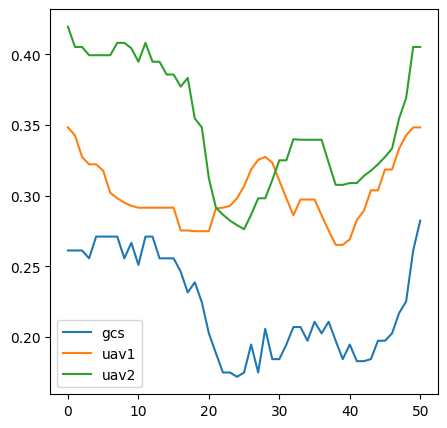

In [71]:
plot_index = 101

model = torch.load('cnn_basic/model_final.pth')
model.to('cpu')
model.eval()
d_s = csi_rssi_cnn_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
iot_original = iot_original.detach().numpy()
uav_original = data[0].detach().numpy()
uav_modify = model(torch.unsqueeze(data[:,0:2,1:52], 0)).detach().numpy()
uav_key = 

# print('original iot:',iot_original)
# print('original uav:',uav_original)
# print('modify uav:',uav_modify)

plt.figure(figsize=(5, 5))
plt.plot(iot_original)
plt.plot(uav_original[0][1:52])
plt.plot(uav_original[1][1:52])
# plt.plot(uav_modify)
plt.legend(['gcs','uav1','uav2'])

plt.show()



### For testing one case (quantified)

In [64]:

plot_index = 101

model = torch.load('cnn_speed_quan_with_LSTM/model_final.pth')
model.to("cpu")
model.eval()
d_s = csi_cnn_quan_lstm_dataset(testset_quan)
data, iot_original = d_s.__getitem__(plot_index)
iot_original = iot_original.detach().numpy()
uav_original = data[0][1]
snr = uav_original[0].detach().numpy()
speed = uav_original[103].detach().numpy()

uav_modify = model(torch.unsqueeze(data,0)).detach().numpy()
print(uav_modify)
for i in range(len(uav_modify)):
    # if uav_modify[i] < 0.5, then set it to 0:
    if uav_modify[i] < 0.5:
        uav_modify[i] = 0
    else:
        uav_modify[i] = 1

print("original: ", iot_original)
print("modify: ", uav_modify)

print("SNR:", snr)
print("Speed:", speed)
print("RAW_KDR:", eval.kdr(iot_original, uav_original[1:103]))
print("KDR:", eval.kdr(iot_original, uav_modify))

key_len = [8, 16, 32, 64, 102]
kdr = [0.0, 0.0, 0.0, 0.0, 0.0]
for i in range(len(key_len)):
    kdr[i] = eval.kdr(iot_original[:key_len[i]], uav_modify[:key_len[i]])

for i in range(len(key_len)):
    print("KDR for key length", key_len[i], ":", kdr[i])

[0.9895606  0.15387392 0.99259585 0.08052018 0.98668855 0.1874686
 0.9903018  0.21239817 0.9928404  0.15368888 0.9947984  0.13182236
 0.9896882  0.21222368 0.9929311  0.1799301  0.9777679  0.37100348
 0.99049824 0.1711858  0.94348127 0.69630975 0.94557744 0.68444484
 0.9544532  0.64393854 0.8556725  0.85261077 0.95430577 0.6929792
 0.95607936 0.6551558  0.93709445 0.8069698  0.930731   0.85569364
 0.6572297  0.9114143  0.6066351  0.9095319  0.30064127 0.84503937
 0.15305421 0.72855186 0.11686483 0.6931063  0.01477245 0.22951303
 0.01327482 0.2182671  0.00134904 0.00930873 0.00146624 0.0176117
 0.00402953 0.05428957 0.01721341 0.2543813  0.01703006 0.2568748
 0.01951127 0.463912   0.05670359 0.7369028  0.04302866 0.79271466
 0.07096746 0.84957635 0.08769714 0.8185203  0.20820563 0.86982536
 0.1037359  0.7588719  0.04599409 0.54761654 0.01908094 0.26858225
 0.01657807 0.14148554 0.03158307 0.33064103 0.01346425 0.28509828
 0.00589576 0.20409523 0.02848389 0.73647624 0.11613174 0.95693916

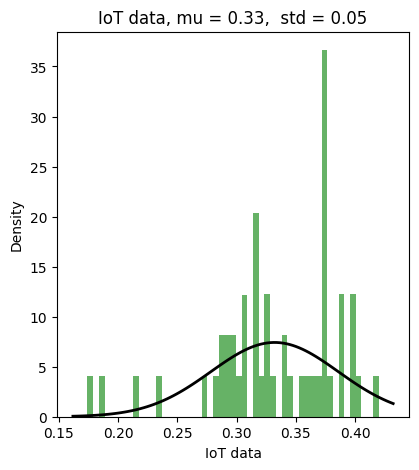

In [33]:
from scipy.stats import norm

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(iot_original, bins=51, density=True, alpha=0.6, color='g')
mu, std = norm.fit(iot_original)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "IoT data, mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('IoT data')
plt.ylabel('Density')

plt.show()

In [34]:
mean_csi = np.mean(iot_original)
std_csi = np.std(iot_original)
print("mean_csi:", mean_csi)
print("std_csi:", std_csi)

mean_csi: 0.33202654
std_csi: 0.05375154


### Classify the different moving case

In [67]:
# classfiy the speed in testset

# hover_speed < 0.15
hover_index = []

# slow_speed < 3
slow_index = []

# fast_speed >= 3
fast_index = []

for i in range(len(testset_quan[0])-1):
    vel = testset_quan[0][i][103]
    if vel < 0.15:
        hover_index.append(i)
    elif vel < 5:
        slow_index.append(i)
    else:
        fast_index.append(i)

# for i in range(len(trainset[0])-1):
#     vel = -(trainset[0][i][103] * 7.118609414766342 - 7.118609414766342)
#     if vel < 0.15:
#         hover_index.append(i)
#     elif vel < 3:
#         slow_index.append(i)
#     else:
#         fast_index.append(i)

# for i in range(len(valiset[0])-1):
#     vel = -(valiset[0][i][103] * 7.118609414766342 - 7.118609414766342)
#     if vel < 0.15:
#         hover_index.append(i)
#     elif vel < 3:
#         slow_index.append(i)
#     else:
#         fast_index.append(i)
        
moving_index = slow_index + fast_index

total_index = [hover_index, fast_index]
status = ["hover", "moving"]

In [68]:
print(len(hover_index), len(slow_index), len(fast_index))


669 1130 250


### Evaluate the KDR of model on different moving situation

In [69]:
# loading models

# encoder models
encoder_basic_quan_model = torch.load('encoder_basic_quan/model_final.pth')
encoder_basic_quan_hover_model = torch.load('encoder_basic_quan_hover/model_final.pth')
encoder_basic_quan_moving_model = torch.load('encoder_basic_quan_moving/model_final.pth')

# fnn models
fnn_basic_quan_model = torch.load('fnn_basic_quan/model_final.pth')
fnn_basic_quan_hover_model = torch.load('fnn_basic_quan_hover/model_final.pth')
fnn_basic_quan_moving_model = torch.load('fnn_basic_quan_moving/model_final.pth')

# cnn models
cnn_basic_quan_model = torch.load('cnn_basic_quan/model_final.pth')
cnn_speed_quan_model = torch.load('cnn_speed_quan/model_final.pth')

# cnn with LSTM models
cnn_speed_quan_with_LSTM_model = torch.load('cnn_speed_quan_with_LSTM/model_final.pth')

In [10]:
# loading dataset

# hover dataset
trainset_hover = np.load("test_set_4/quantified_speed_hover_training_set.npy")
testset_hover = np.load("test_set_4/quantified_speed_hover_testing_set.npy")
valiset_hover = np.load("test_set_4/quantified_speed_hover_validation_set.npy")

# moving dataset
trainset_moving = np.load("test_set_4/quantified_speed_moving_training_set.npy")
testset_moving = np.load("test_set_4/quantified_speed_moving_testing_set.npy")
valiset_moving = np.load("test_set_4/quantified_speed_moving_validation_set.npy")


#### Encoder model

##### Basic

In [70]:
# encoder basic quan model
encoder_basic_quan_model.to("cpu")
encoder_basic_quan_model.eval()

raw_kdr_list = []
encoder_kdr_list = []

for s in total_index:
    raw_kdr = 0
    kdr = 0
    for i in range(len(s)):
        d_s = csi_quan_dataset(testset_quan)
        data, iot_original = d_s.__getitem__(s[i])
        iot_original = iot_original.detach().numpy()
        uav_original = data
        uav_modify = encoder_basic_quan_model(data).detach().numpy()
        for i in range(len(uav_modify)):
            # if uav_modify[i] < 0.5, then set it to 0:
            if uav_modify[i] < 0.5:
                uav_modify[i] = 0
            else:
                uav_modify[i] = 1
        raw_kdr += eval.kdr(iot_original, uav_original)
        kdr += eval.kdr(iot_original, uav_modify)
    raw_kdr_list.append(raw_kdr/len(s))
    encoder_kdr_list.append(kdr/len(s))
    print(raw_kdr/len(s), kdr/len(s))

0.14153404261555202 0.17394999853454113
0.12674509803921538 0.14388235294117668


##### Hover & Moving

In [12]:
# encoder basic quan hover model

encoder_basic_quan_hover_model.to("cpu")
encoder_basic_quan_hover_model.eval()

raw_kdr = 0
kdr = 0

for i in range(len(testset_hover[0])):
    d_s = csi_quan_dataset(testset_hover)
    data, iot_original = d_s.__getitem__(i)
    iot_original = iot_original.detach().numpy()
    uav_original = data
    uav_modify = encoder_basic_quan_hover_model(data).detach().numpy()
    for i in range(len(uav_modify)):
        # if uav_modify[i] < 0.5, then set it to 0:
        if uav_modify[i] < 0.5:
            uav_modify[i] = 0
        else:
            uav_modify[i] = 1
    raw_kdr += eval.kdr(iot_original, uav_original)
    kdr += eval.kdr(iot_original, uav_modify)

print(raw_kdr/len(testset_hover[0]))
print(kdr/len(testset_hover[0]))
encoder_kdr_list.append(kdr/len(testset_hover[0]))

0.3492374727668848
0.3390341321713872


In [13]:
# encoder basic quan moving model

encoder_basic_quan_moving_model.to("cpu")
encoder_basic_quan_moving_model.eval()

raw_kdr = 0
kdr = 0

for i in range(len(testset_moving[0])):
    d_s = csi_quan_dataset(testset_moving)
    data, iot_original = d_s.__getitem__(i)
    iot_original = iot_original.detach().numpy()
    uav_original = data
    uav_modify = encoder_basic_quan_moving_model(data).detach().numpy()
    for i in range(len(uav_modify)):
        # if uav_modify[i] < 0.5, then set it to 0:
        if uav_modify[i] < 0.5:
            uav_modify[i] = 0
        else:
            uav_modify[i] = 1
    raw_kdr += eval.kdr(iot_original, uav_original)
    kdr += eval.kdr(iot_original, uav_modify)

print(raw_kdr/len(testset_moving[0]))
print(kdr/len(testset_moving[0]))
encoder_kdr_list.append(kdr/len(testset_moving[0]))

0.41858900422914347
0.405148660771498


#### FNN model

##### basic

In [26]:
# fnn basic quan model

fnn_basic_quan_model.to("cpu")
fnn_basic_quan_model.eval()

fnn_kdr_list = []

for s in total_index:
    kdr = 0
    for i in range(len(s)):
        d_s = csi_quan_dataset(testset_quan)
        data, iot_original = d_s.__getitem__(s[i])
        iot_original = iot_original.detach().numpy()
        uav_original = data[0]
        uav_modify = fnn_basic_quan_model(data).detach().numpy()
        for i in range(len(uav_modify)):
            # if uav_modify[i] < 0.5, then set it to 0:
            if uav_modify[i] < 0.5:
                uav_modify[i] = 0
            else:
                uav_modify[i] = 1
        kdr += eval.kdr(iot_original, uav_modify)
    fnn_kdr_list.append(kdr/len(s))
    print(kdr/len(s))

0.22468891402714938
0.19929411764705884


##### Hover & Moving

In [15]:
# fnn basic quan hover model

fnn_basic_quan_hover_model.to("cpu")
fnn_basic_quan_hover_model.eval()

raw_kdr = 0
kdr = 0

for i in range(len(testset_hover[0])):
    d_s = csi_quan_dataset(testset_hover)
    data, iot_original = d_s.__getitem__(i)
    iot_original = iot_original.detach().numpy()
    uav_original = data
    uav_modify = fnn_basic_quan_hover_model(data).detach().numpy()
    for i in range(len(uav_modify)):
        # if uav_modify[i] < 0.5, then set it to 0:
        if uav_modify[i] < 0.5:
            uav_modify[i] = 0
        else:
            uav_modify[i] = 1

    raw_kdr += eval.kdr(iot_original, uav_original)
    kdr += eval.kdr(iot_original, uav_modify)

print(raw_kdr/len(testset_hover[0]))
print(kdr/len(testset_hover[0]))
fnn_kdr_list.append(kdr/len(testset_hover[0]))

0.3492374727668848
0.3769789397240381


In [16]:
# fnn basic quan moving model

fnn_basic_quan_moving_model.to("cpu")
fnn_basic_quan_moving_model.eval()

raw_kdr = 0
kdr = 0

for i in range(len(testset_moving[0])):
    d_s = csi_quan_dataset(testset_moving)
    data, iot_original = d_s.__getitem__(i)
    iot_original = iot_original.detach().numpy()
    uav_original = data
    uav_modify = fnn_basic_quan_moving_model(data).detach().numpy()
    for i in range(len(uav_modify)):
        # if uav_modify[i] < 0.5, then set it to 0:
        if uav_modify[i] < 0.5:
            uav_modify[i] = 0
        else:
            uav_modify[i] = 1

    raw_kdr += eval.kdr(iot_original, uav_original)
    kdr += eval.kdr(iot_original, uav_modify)

print(raw_kdr/len(testset_moving[0]))
print(kdr/len(testset_moving[0]))
fnn_kdr_list.append(kdr/len(testset_moving[0]))

0.41858900422914347
0.4288414712290143


#### CNN model

In [18]:
# cnn basic quan model

cnn_basic_quan_model.to("cpu")
cnn_basic_quan_model.eval()

raw_kdr_list = []
cnn_kdr_list = []

for s in total_index:
    raw_kdr = 0
    kdr = 0
    for i in range(len(s)):
        d_s = csi_cnn_quan_dataset(testset_quan)
        data, iot_original = d_s.__getitem__(s[i])
        iot_original = iot_original.detach().numpy()
        uav_original = data[0][1]
        snr = uav_original[0].detach().numpy()
        uav_modify = cnn_basic_quan_model(data).detach().numpy()
        for i in range(len(uav_modify)):
            if uav_modify[i] < 0.5:
                uav_modify[i] = 0
            else:
                uav_modify[i] = 1
        raw_kdr += eval.kdr(uav_original, iot_original)
        kdr += eval.kdr(uav_modify, iot_original)
    raw_kdr_list.append(raw_kdr/len(s))
    cnn_kdr_list.append(kdr/len(s))
    print("RAW:", raw_kdr/len(s))
    print(kdr/len(s))

RAW: 0.15035822021116102
0.1705788084464556
RAW: 0.12886274509803888
0.1481176470588236


In [18]:
cnn_speed_quan_model.to("cpu")
cnn_speed_quan_model.eval()

cnn_speed_kdr_list = []

for s in total_index:
    kdr = 0
    for i in range(len(s)):
        d_s = csi_cnn_speed_quan_dataset(testset)
        data, iot_original = d_s.__getitem__(s[i])
        iot_original = iot_original.detach().numpy()
        uav_original = data[0][0][:102]
        uav_modify = cnn_speed_quan_model(torch.unsqueeze(data,0)).detach().numpy()
        for i in range(len(uav_modify)):
            if uav_modify[i] < 0.5:
                uav_modify[i] = 0
            else:
                uav_modify[i] = 1
        kdr += eval.kdr(uav_modify, iot_original)
    cnn_speed_kdr_list.append(kdr/len(s))
    print(kdr/len(s))

0.17345399698340888
0.16239215686274514


In [31]:
# cnn speed quan with LSTM model

cnn_speed_quan_with_LSTM_model.to("cpu")
cnn_speed_quan_with_LSTM_model.eval()

cnn_speed_quan_with_LSTM_kdr_list = []
cnn_quan_with_LSTM_kdr_list = []

for s in total_index:
    kdr_8 = 0
    kdr_16 = 0
    kdr_32 = 0
    kdr_64 = 0
    kdr_102 = 0
    for i in range(len(s)):
        d_s = csi_cnn_quan_lstm_dataset(testset)
        data, iot_original = d_s.__getitem__(s[i])
        iot_original = iot_original.detach().numpy()
        uav_original = data[0][0]
        uav_modify = cnn_speed_quan_with_LSTM_model(torch.unsqueeze(data,0)).detach().numpy()
        for i in range(len(uav_modify)):
            if uav_modify[i] < 0.5:
                uav_modify[i] = 0
            else:
                uav_modify[i] = 1
        kdr_8 += eval.kdr(uav_modify[-8:], iot_original[-8:])
        kdr_16 += eval.kdr(uav_modify[-16:], iot_original[-16:])
        kdr_32 += eval.kdr(uav_modify[-32:], iot_original[-32:])
        kdr_64 += eval.kdr(uav_modify[-64:], iot_original[-64:])
        kdr_102 += eval.kdr(uav_modify, iot_original)
    kdr = [kdr_8/len(s), kdr_16/len(s), kdr_32/len(s), kdr_64/len(s), kdr_102/len(s)]
    cnn_quan_with_LSTM_kdr_list.append(kdr)

for i in range(len(cnn_quan_with_LSTM_kdr_list[0])):
    for j in range(len(cnn_quan_with_LSTM_kdr_list)):
        print(status[j], key_len[i], ":", cnn_quan_with_LSTM_kdr_list[j][i])



Hover 8 : 0.11057692307692307
Moving 8 : 0.125
Hover 16 : 0.14513221153846154
Moving 16 : 0.125
Hover 32 : 0.16766826923076922
Moving 32 : 0.142
Hover 64 : 0.17457932692307693
Moving 64 : 0.1525
Hover 102 : 0.17307692307692318
Moving 102 : 0.14772549019607858


### plot

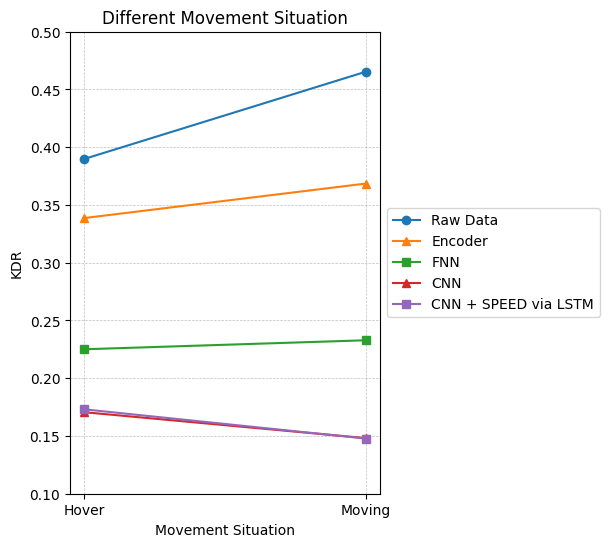

In [23]:
plt.figure(figsize=(4,6))

plt.title("Different Movement Situation")
status = ['Hover','Moving']
# raw = [raw_hover_kdr, raw_slow_kdr, raw_fast_kdr]
# encoder = [encoder_hover_kdr, encoder_slow_kdr, encoder_fast_kdr]
# fnn = [fnn_hover_kdr, fnn_slow_kdr, fnn_fast_kdr]
# cnn = [cnn_hover_kdr, cnn_slow_kdr, cnn_fast_kdr]
# rssi = [rssi_hover_kdr, rssi_slow_kdr, rssi_fast_kdr]
# speed = [cnn_speed_hover_kdr, cnn_speed_slow_kdr, cnn_speed_fast_kdr]
# speed_label = [cnn_speed_hover_label_kdr, cnn_speed_slow_label_kdr, cnn_speed_fast_label_kdr]
raw = [raw_kdr_list[0], raw_kdr_list[1]]
encoder = [encoder_kdr_list[0], encoder_kdr_list[1]]
# encoder_split = [encoder_kdr_list[4], encoder_kdr_list[5]]
fnn = [fnn_kdr_list[0], fnn_kdr_list[1]]
# fnn_split = [fnn_kdr_list[4], fnn_kdr_list[5]]
cnn = [cnn_kdr_list[0], cnn_kdr_list[1]]
# speed = [cnn_speed_kdr_list[0], cnn_speed_kdr_list[3]]
# cnn_speed_lstm = [cnn_speed_quan_with_LSTM_kdr_list[0], cnn_speed_quan_with_LSTM_kdr_list[1]]
cnn_lstm = [cnn_quan_with_LSTM_kdr_list[0][3], cnn_quan_with_LSTM_kdr_list[1][3]]
# speed_label = cnn_speed_label_kdr_list[:3]
x = np.arange(len(status))
plt.plot(x, raw, label='Raw Data',marker='o')
plt.plot(x, encoder, label='Encoder',marker='^')
# plt.plot(x, encoder_split, label='Encoder Split',marker='v')
plt.plot(x, fnn, label='FNN',marker='s')
# plt.plot(x, fnn_split, label='FNN Split',marker='*')
plt.plot(x, cnn, label='CNN',marker='^')
# plt.plot(x, rssi, label='CNN + RSSI',marker='h')
# plt.plot(x, speed, label='CNN + SPEED',marker='v')
plt.plot(x, cnn_lstm, label='CNN + SPEED via LSTM',marker='s')
# plt.plot(x, speed_label, label='CNN + SPEED using SPEED as label',marker='x')
plt.xticks(x, status)
plt.xlabel('Movement Situation')
plt.ylim(0.1,0.5)
#let legend locate at the best position
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5,which='major')
plt.ylabel('KDR')

plt.show()

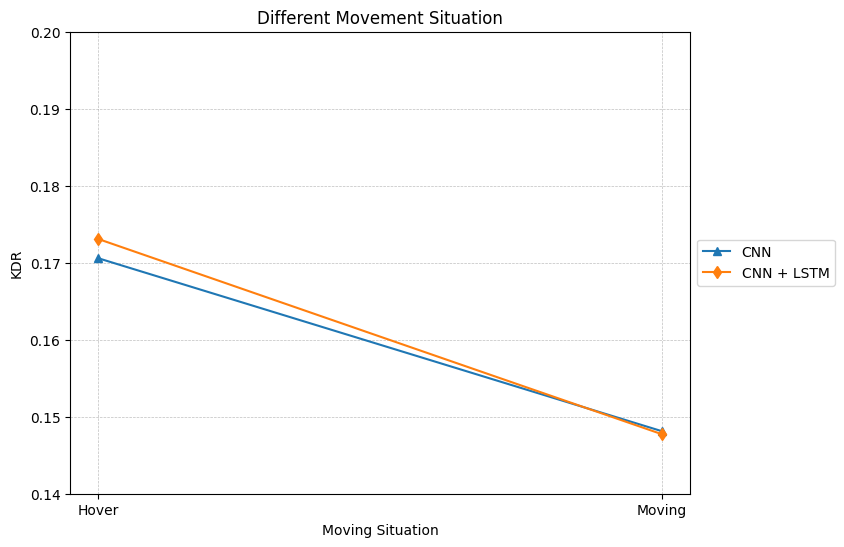

In [33]:
plt.figure(figsize=(8,6))

plt.title("Different Movement Situation")
status = ['Hover','Moving']
raw = [raw_kdr_list[0], raw_kdr_list[1]]
cnn = [cnn_kdr_list[0], cnn_kdr_list[1]]
# cnn_speed = [cnn_speed_kdr_list[0], cnn_speed_kdr_list[3]]
# cnn_speed_LSTM = [cnn_speed_quan_with_LSTM_kdr_list[0], cnn_speed_quan_with_LSTM_kdr_list[3]]
cnn_LSTM = [cnn_quan_with_LSTM_kdr_list[0][4], cnn_quan_with_LSTM_kdr_list[1][4]]

x = np.arange(len(status))
# plt.plot(x, raw, label='Raw Data',marker='o')
plt.plot(x, cnn, label='CNN',marker='^')
# plt.plot(x, cnn_speed, label='CNN + SPEED',marker='v')
# plt.plot(x, cnn_speed_LSTM, label='CNN + SPEED + LSTM',marker='s')
plt.plot(x, cnn_LSTM, label='CNN + LSTM',marker='d')
plt.xticks(x, status)
plt.xlabel('Moving Situation')
plt.ylim(0.14,0.2)
#let legend locate at the best position
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5,which='major')
plt.ylabel('KDR')

plt.show()



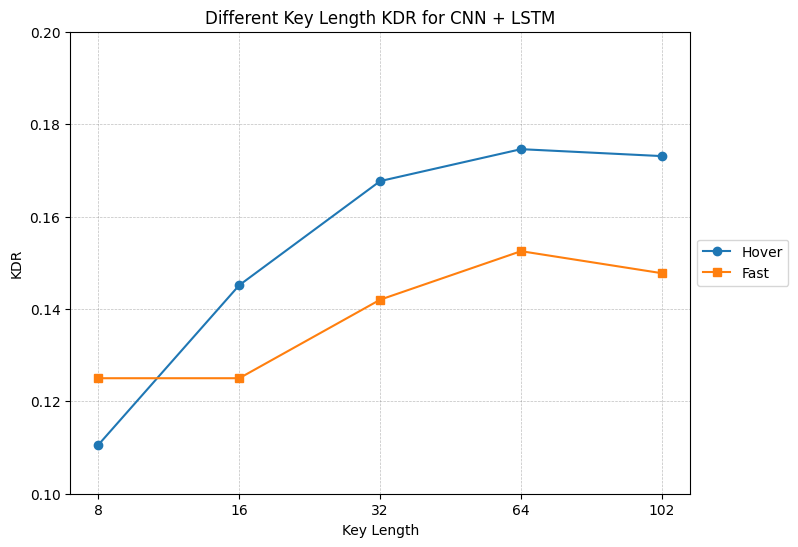

In [34]:
plt.figure(figsize=(8,6))

plt.title("Different Key Length KDR for CNN + LSTM")
hover = cnn_quan_with_LSTM_kdr_list[0]
# slow = cnn_quan_with_LSTM_kdr_list[1]
fast = cnn_quan_with_LSTM_kdr_list[1]
x = np.arange(len(key_len))
plt.plot(x, hover, label='Hover',marker='o')
# plt.plot(x, slow, label='Slow',marker='^')
plt.plot(x, fast, label='Fast',marker='s')
plt.xticks(x, key_len)
plt.xlabel('Key Length')
plt.ylim(0.1,0.2)
#let legend locate at the best position
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5,which='major')
plt.ylabel('KDR')

plt.show()